In [2]:
import rasterio as rio
#https://stackoverflow.com/questions/67903219/how-to-read-multiband-image-files-with-more-than-4-bands-in-python


# import georasters as gt
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# data_loc = '/home/saumya/Documents/NRSC internship/Dataset/MRSDP_SLC_DATA/EOS4_FRS1_SLC/Pauli_Lee5X5/'
data_loc = '/home/saumya/Documents/NRSC SAR CVNN/Data-sets/MRSDP_SLC_DATA/EOS4_FRS1_SLC/Pauli_Lee5X5/'

# loc_list = ['imagery_HH_421.tif', 'imagery_HH_521.tif', 'imagery_HH_721.tif']
# goblin = '.npy'

In [4]:
# for i in range(3):
#     dat = rio.open(data_loc + loc_list[i])
#     arr1 = dat.read(1)
#     arr2 = dat.read(2)
#     arr3 = np.array(arr1 + 1j*arr2)
#     # arr3 = arr3.reshape(8371, 13619)
#     np.save(data_loc+loc_list[i], arr3)

In [5]:
img = 'Pauli_RGB.tif'

In [6]:
dat = rio.open(data_loc + img)

In [7]:
# using 1 for red, 2 for green and 3 for blue as show in QGIS

arr2 = dat.read(2)
arr3 = dat.read(3)
arr1 = dat.read(1)

In [80]:
arr1_per = arr1/(arr1 + arr2 + arr3)
arr2_per = arr2/(arr1 + arr2 + arr3)
arr3_per = arr3/(arr1 + arr2 + arr3)

In [83]:
arr1_per = arr1_per*255
arr2_per = arr2_per*255
arr3_per = arr3_per*255

In [90]:
# np.zeros([arr2_per.shape+[:,:, 3]])

SyntaxError: invalid syntax (200091510.py, line 1)

In [10]:
# plt.hist(arr1_per)

In [11]:
# plt.hist(arr2_per)

In [12]:
# plt.hist(arr3_per)

In [73]:
arr1_norm = arr1/arr1.max()

TypeError: Invalid shape (3, 7779, 4038) for image data

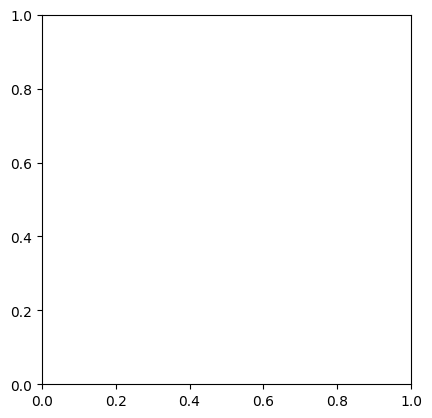

In [86]:
plt.imshow(img)

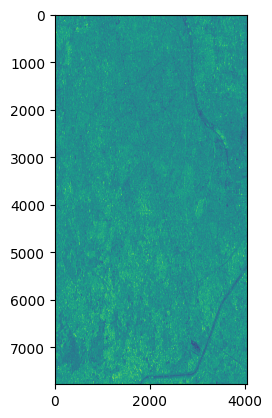

In [82]:
plt.imshow(arr3_per)

In [16]:
arr1_per.shape[1]

4038

In [17]:
count1 = 0
count2 = 0
count3 = 0

mask = np.zeros_like(arr1_per)
for i in range(arr1_per.shape[0]):
    for j in range(arr1_per.shape[1]):
        if arr1_per[i][j] > 50:
            mask[i][j]=1
            count1+=1
        elif arr2_per[i][j] > 50:
            mask[i][j]=2
            count2+=1
        elif arr3_per[i][j] > 50:
            mask[i][j]=3
            count3+=1
            # if arr2_per[i][j] >50:
                # print(arr2_per[i][j])


In [18]:
import patchify as pat

In [21]:
def binin(a):
    cot = np.ravel(a).astype(np.int8)
    counts = np.bincount(cot)
    # val , count = np.unique(a, return_counts=True)
    # print(val, count)
    new = np.ones(a.shape, dtype=np.int8)
    return(np.argmax(counts)*new)
   
    # ind = np.argmax(count)
    # print(val ,)
    # return(np.argmax(uniq))

In [33]:
def rm_noise(mask, a):
    patchi = pat.patchify(mask, a)
    patchi_new = np.zeros_like(patchi)
    for i in range(patchi.shape[0]):
        for j in range(patchi.shape[1]):
            patchi_new[i][j] = binin(patchi[i][j])
    mask_new = pat.unpatchify(patchi_new, mask.shape)
    mask_new = np.array(mask_new, dtype= np.int8)
    return(mask_new)

In [47]:
mask_new = rm_noise(mask, (4,4))

In [48]:
np.unique(mask_new)

array([0, 1, 2, 3], dtype=int8)

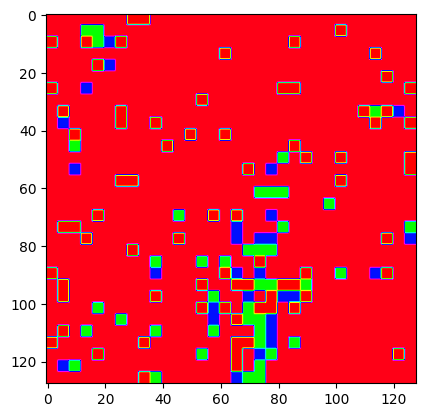

In [49]:
plt.imshow(mask_new[:128, :128], cmap='hsv')

In [28]:
from statistics import mode

In [29]:
mode(patches[5000][550])

TypeError: unhashable type: 'numpy.ndarray'

In [64]:
count = 0
for i in mask_new:
    for j in i:
        if j == 3:
            count=+1

In [65]:
count

0

In [ ]:
arr1.size

31411602

In [ ]:
count3

17230423

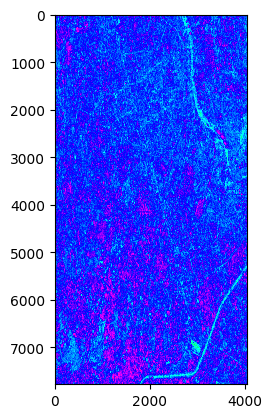

In [ ]:
plt.imshow(mask, cmap='hsv')

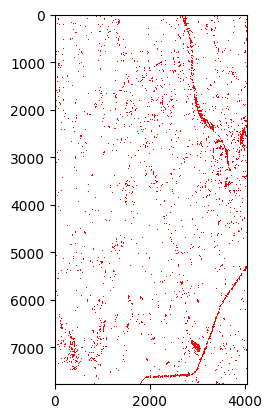

In [68]:
import matplotlib as mpl

colors = ['white','red','white','white']
levels = [0, 1, 2, 3]

cmap, norm = mpl.colors.from_levels_and_colors(levels=levels, colors=colors, extend='max')

plt.imshow(mask_new, cmap=cmap, norm=norm)


In [ ]:
# count4 = 0
# for i in mask:
#     for j in i:
#         if j == 1:
#             count4+=1

In [ ]:
# count4

In [ ]:
# count4

In [ ]:
# count4

In [ ]:
479722+479722+479722-31411602

-29972436

In [ ]:
29972436/31411602*100

95.41836166140142

In [ ]:
mask = np.array(mask, dtype=np.int8)

In [ ]:
np.save(data_loc + 'mask', mask)

In [ ]:
#Reading the data file as the input 

file_loc = '/home/saumya/Documents/NRSC internship/Dataset/MRSDP_SLC_DATA/EOS4_FRS1_SLC/scene_HH/'
# file_loc = '/home/saumya/Documents/NRSC SAR CVNN/Data-sets/MRSDP_SLC_DATA/EOS4_FRS1_SLC/scene_HH/'
input_file = 'imagery_HH.tif'

in_data = rio.open(file_loc + input_file)

In [ ]:
real = in_data.read(1)
img = in_data.read(2)

In [ ]:
input_arr = np.array(real + 1j*img,dtype= np.complex64)

In [ ]:
input_arr.dtype

dtype('complex64')

In [ ]:
input_arr[0][0]

(599-410j)

In [ ]:
np.save(file_loc+'input', input_arr)